In [1]:
from mapbuilder import MapBuilder
from invprojection import  RBFinv, Pinv_ilamp, NNinv_torch, SSNP, PPinvWrapper
from sklearn.preprocessing import minmax_scale, MinMaxScaler
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE, MDS
from sklearn.linear_model import LogisticRegression
from umap import UMAP
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris


/home/peyote/workspace/map_builder/mapbuilder/tools.py:66: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit
/home/peyote/workspace/map_builder/mapbuilder/tools.py:140: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit
2024-11-14 16:35:41.078010: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical resul

In [19]:
X, y = make_blobs(n_samples=800, centers=4, n_features=30, random_state=42)
X = minmax_scale(X)
# X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
# X = np.array(X)
# y = np.array(y)
# X = X.astype('float32') / 255.
# y = y.astype('int')
# X, _, y, _ = train_test_split(X, y, train_size=2000, test_size=2000, random_state=420)
# iris = load_iris()
# X = iris.data
# y = iris.target
# X = minmax_scale(X)

# clf = LogisticRegression()
# clf.fit(X, y)

In [28]:
# P = UMAP(n_components=2)

# # X2D = TSNE(n_components=2).fit_transform(X)
# X2D = P.fit_transform(X)
# plt.scatter(X2D[:, 0], X2D[:, 1], c=y)
# Pinv = NNinv_torch(dims=[128, 256, 512, 1024])
# # Pinv = NNinv_torch()
# # Pinv = RBFinv()
# # Pinv = Pinv_ilamp()
# Pinv.fit(X2D, X)

# PPinv = SSNP()
PPinv = PPinvWrapper(UMAP(n_components=2), NNinv_torch((128, 256, 512, 1024)))
# PPinv = PPinvWrapper(UMAP(n_components=2), RBFinv())
PPinv.fit(X=X, y=y)
X2D = PPinv.transform(X)

device:  cuda:0
Epoch 1/150, Loss: 0.07084454
Epoch 2/150, Loss: 0.01841890
Epoch 3/150, Loss: 0.00792928
Epoch 4/150, Loss: 0.00515081
Epoch 5/150, Loss: 0.00415634
Epoch 6/150, Loss: 0.00376121
Epoch 7/150, Loss: 0.00358750
Epoch 8/150, Loss: 0.00354095
Epoch 9/150, Loss: 0.00350729
Epoch 10/150, Loss: 0.00348239
Epoch 11/150, Loss: 0.00347643
Epoch 12/150, Loss: 0.00347233
Epoch 13/150, Loss: 0.00346927
Epoch 14/150, Loss: 0.00346770
Epoch 15/150, Loss: 0.00346451
Epoch 16/150, Loss: 0.00346268
Epoch 17/150, Loss: 0.00346131
Epoch 18/150, Loss: 0.00345984
Epoch 19/150, Loss: 0.00345857
Epoch 20/150, Loss: 0.00345653
Epoch 21/150, Loss: 0.00345476
Epoch 22/150, Loss: 0.00345319
Epoch 23/150, Loss: 0.00345128
Epoch 24/150, Loss: 0.00344939
Epoch 25/150, Loss: 0.00344747
Epoch 26/150, Loss: 0.00344533
Epoch 27/150, Loss: 0.00344299
Epoch 28/150, Loss: 0.00344052
Epoch 29/150, Loss: 0.00343777
Epoch 30/150, Loss: 0.00343486
Epoch 31/150, Loss: 0.00343114
Epoch 32/150, Loss: 0.00342722
E

In [29]:
builder = MapBuilder(PPinv, None, X2d=X2D, X=X, y=y, scaling=0.9)

n_classes: 4
150


Loss: 0.7615: 100%|██████████| 150/150 [00:00<00:00, 153.61it/s]


/home/peyote/workspace/map_builder/mapbuilder/deepfool_neigbor.py:155: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  orig_classes = T.tensor(labels, device=input_batch.device, dtype=T.long)


fast strategy
fast strategy
relace the label with the gradient
fast strategy
relace the label with the dist_map
fast strategy
fast strategy


<Axes: title={'center': 'label'}>

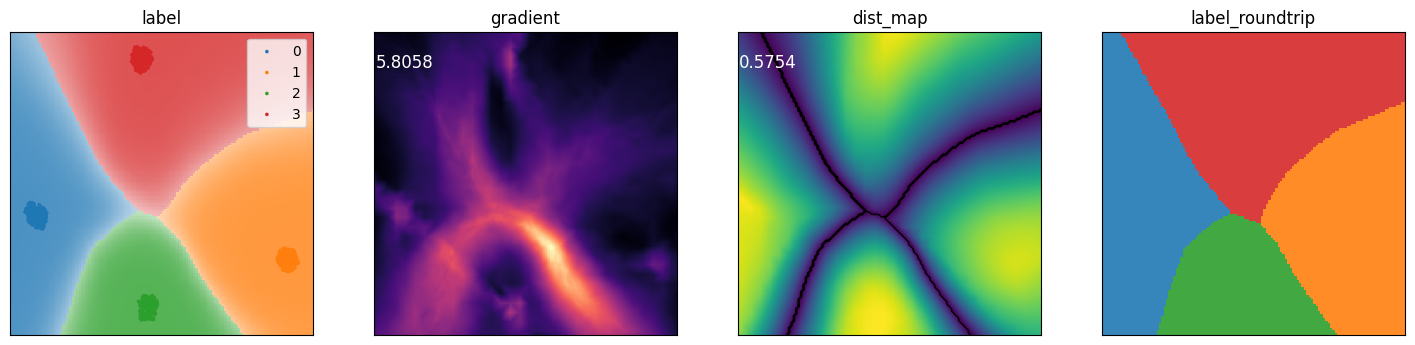

In [30]:
conten_list = ['label', 'gradient',  'dist_map', 'label_roundtrip',]
fast_strategy = True
fig, ax = plt.subplots(1, 4, figsize=(18, 5))

# builder.plot_decision_map(ax[0],  fast=fast_strategy, grid=200)
# builder.plot_training_data(ax=ax[0])
# builder.plot_gradient_map(ax[1],  fast=fast_strategy, grid=500)


for i, content in enumerate(conten_list):
    builder.plot_map(ax[i], content=content, fast=fast_strategy, grid=128)
    ax[i].set_title(content)
    ax[i].set_aspect('equal')

builder.plot_training_data(ax=ax[0])
# fig.savefig('figures/dummy.png', dpi=300)

In [31]:
# fig.savefig('figures/dummy.png', dpi=300)

slow strategy
slow strategy
slow strategy
slow strategy
slow strategy


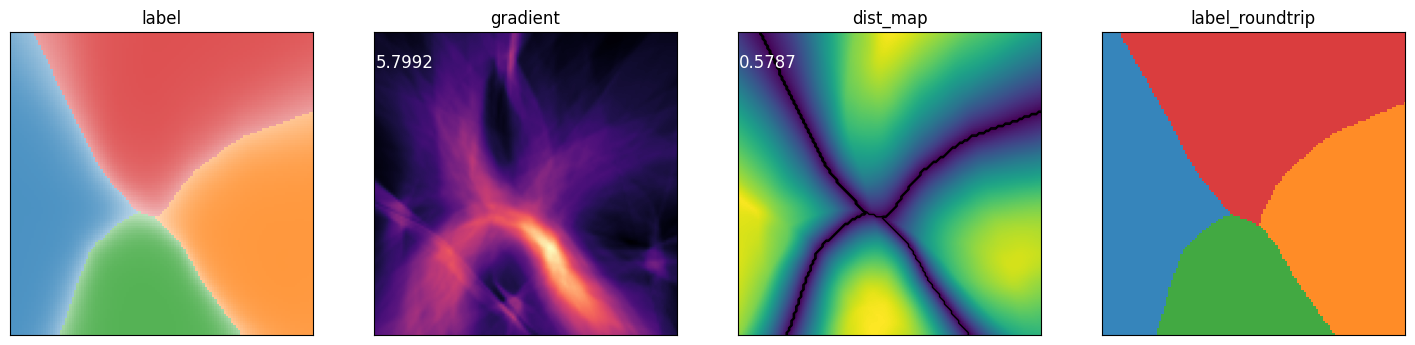

In [32]:
conten_list = ['label', 'gradient',  'dist_map', 'label_roundtrip',]
fast_strategy = False
fig, ax = plt.subplots(1, 4, figsize=(18, 5))

# builder.plot_decision_map(ax[0],  fast=fast_strategy, grid=200)
# builder.plot_training_data(ax=ax[0])
# builder.plot_gradient_map(ax[1],  fast=fast_strategy, grid=500)


for i, content in enumerate(conten_list):
    builder.plot_map(ax[i], content=content, fast=fast_strategy, grid=128)
    ax[i].set_title(content)
    ax[i].set_aspect('equal')

# fig.savefig('figures/fast.png', dpi=300)

fast strategy
relace the label with the gradient
fast strategy
relace the label with the gradient


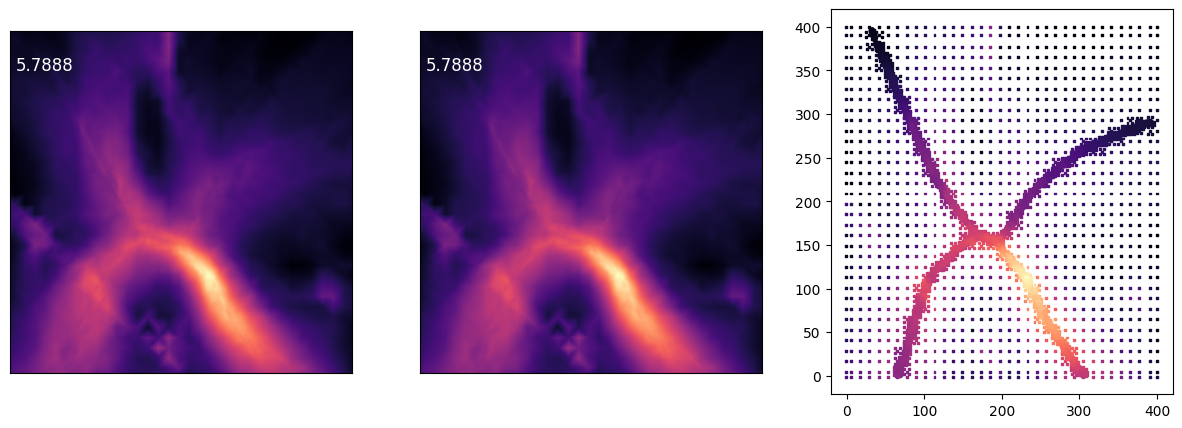

In [33]:
conten_list = ['label', 'gradient', 'label_roundtirp']
fast_strategy = True
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# builder.plot_decision_map(ax[0],  fast=fast_strategy, grid=200)
# builder.plot_training_data(ax=ax[0])
_, sparse = builder.plot_gradient_map(ax[0],  fast=True, grid=400)
_, sparse = builder.plot_gradient_map(ax[1],  fast=fast_strategy, grid=400)
# builder.plot_boundary(ax[1], grid=400, fast=fast_strategy)
ax[2].scatter(sparse[:, 0], sparse[:, 1], c=sparse[:, 2], cmap='magma', marker='s', s=2)

# fig.savefig('figures/spares.png', dpi=300)


fast strategy
relace the label with the dist_map


/home/peyote/workspace/map_builder/mapbuilder/deepfool_neigbor.py:155: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  orig_classes = T.tensor(labels, device=input_batch.device, dtype=T.long)


fast strategy
fast strategy
relace the label with the dist_map


/home/peyote/workspace/map_builder/mapbuilder/deepfool_neigbor.py:155: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  orig_classes = T.tensor(labels, device=input_batch.device, dtype=T.long)


fast strategy


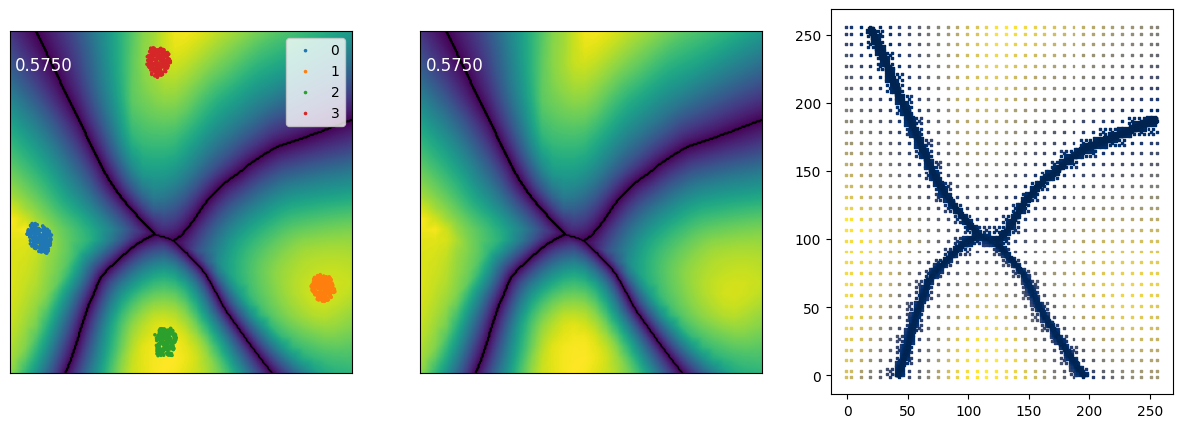

In [34]:
conten_list = ['label', 'gradient', 'label_roundtirp']
fast_strategy = True
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

builder.plot_dist_map(ax[0],  fast=fast_strategy, grid=256)
builder.plot_training_data(ax=ax[0])
_, sparse = builder.plot_dist_map(ax[1],  fast=fast_strategy, grid=256, initial_resolution=32)
# builder.plot_boundary(ax[1], grid=400, fast=fast_strategy)
ax[2].scatter(sparse[:, 0], sparse[:, 1], c=sparse[:, 2], cmap='cividis', marker='s', s=2)

# fig.savefig('figures/spares.png', dpi=300)


fast strategy
fast strategy
relace the label with the gradient


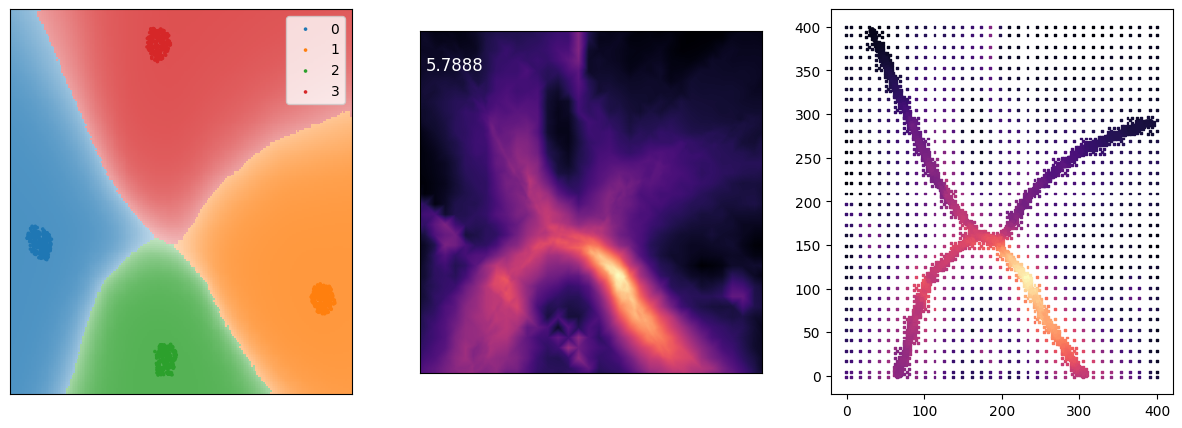

In [35]:
conten_list = ['label', 'gradient', 'label_roundtirp']
fast_strategy = True
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

builder.plot_decision_map(ax[0],  fast=fast_strategy, grid=200)
builder.plot_training_data(ax=ax[0])
_, sparse = builder.plot_gradient_map(ax[1],  fast=fast_strategy, grid=400)
# builder.plot_boundary(ax[1], grid=400, fast=fast_strategy)
ax[2].scatter(sparse[:, 0], sparse[:, 1], c=sparse[:, 2], cmap='magma', marker='s', s=2)

# fig.savefig('figures/spares.png', dpi=300)
